<a href="https://colab.research.google.com/github/germanhyt/001_DA_Review_Python_For_DataAnalytics/blob/main/An%C3%A1lisis_de_datos_con_pyhton_Dataset_Adventure_Works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Permitir conectarse a mi drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Manejo de datos con Pandas

## Carga de datos

In [3]:
# Importar librerías
import pandas as pd

In [4]:
# Pandas permite cargar datos desde diferentes fuentes, como archivos CSV, Excel, bases de datos, etc
path_superstore = "/content/drive/MyDrive/Colab Notebooks/Data_Adventure_Works/Ventas Adventure Works.xlsx"
sheet_sales = pd.read_excel(path_superstore,sheet_name='Ventas')
sheet_dates = pd.read_excel(path_superstore,sheet_name='Fechas')
sheet_customers = pd.read_excel(path_superstore,sheet_name='Clientes')
sheet_geo = pd.read_excel(path_superstore,sheet_name='Geografia')
sheet_products = pd.read_excel(path_superstore,sheet_name='Productos')
sheet_subcategory = pd.read_excel(path_superstore,sheet_name='Subcategorias')
sheet_category = pd.read_excel(path_superstore,sheet_name='Categorias')

## Exploración de datos

In [5]:
# Para obtener información de los primeros 5 registros
sheet_sales.head()
# sheet_dates.head()
# sheet_customers.head()
# sheet_geo.head()
# sheet_products.head()
# sheet_subcategory.head()
# sheet_category.head()

,CodProducto,CodCliente,Cantidad,Precio,Coste,Venta,%IVA,IVA,Fecha Orden
0,575,24201,1,2384.0700,1481.9379,2384.0700,4,190.7256,2008-01-13
1,487,18309,1,54.9900,20.5663,54.9900,8,4.3992,2007-08-02
2,567,29091,1,742.3500,461.4448,742.3500,10,59.3880,2008-02-05
3,383,14253,1,1000.4375,605.6492,1000.4375,21,80.0350,2006-12-03
4,528,13917,1,4.9900,1.8663,4.9900,8,0.3992,2007-09-02


In [6]:
# Para obtener información de los últimos 5 registros
sheet_sales.tail()

,CodProducto,CodCliente,Cantidad,Precio,Coste,Venta,%IVA,IVA,Fecha Orden
60393,538,25939,1,21.49,8.0373,21.49,4,1.7192,2008-05-10
60394,480,24827,1,2.29,0.8565,2.29,4,0.1832,2007-10-09
60395,536,20169,1,29.99,11.2163,29.99,4,2.3992,2008-07-28
60396,480,28378,1,2.29,0.8565,2.29,4,0.1832,2008-06-23
60397,217,11331,1,34.99,13.0863,34.99,4,2.7992,2008-05-14


In [7]:
# Para obtener información sobre las columnas y tipos de datos
sheet_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CodProducto  60398 non-null  int64         
 1   CodCliente   60398 non-null  int64         
 2   Cantidad     60398 non-null  int64         
 3   Precio       60398 non-null  float64       
 4   Coste        60398 non-null  float64       
 5   Venta        60398 non-null  float64       
 6   %IVA         60398 non-null  int64         
 7   IVA          60398 non-null  float64       
 8   Fecha Orden  60398 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 4.1 MB


In [8]:
# Para resumen estadístico de las columnas numéricas
sheet_sales.describe()

,CodProducto,CodCliente,Cantidad,Precio,Coste,Venta,%IVA,IVA
count,60398.000000,60398.000000,60398.0,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000
mean,437.557932,18841.685420,1.0,486.086911,286.065657,486.086911,9.167059,38.886954
std,118.088390,5432.430404,0.0,928.489892,552.457641,928.489892,5.505252,74.279193
min,214.000000,11000.000000,1.0,2.290000,0.856500,2.290000,4.000000,0.183200
25%,359.000000,14003.000000,1.0,7.950000,2.973300,7.950000,4.000000,0.636000
50%,479.000000,18143.000000,1.0,29.990000,11.216300,29.990000,8.000000,2.399200
75%,529.000000,23429.750000,1.0,539.990000,294.579700,539.990000,10.000000,43.199200
max,606.000000,29483.000000,1.0,3578.270000,2171.294200,3578.270000,21.000000,286.261600


In [9]:
# Comprobar valores nulos en el DataFrame
sheet_sales.isnull().sum()
sheet_category.isnull().sum()
sheet_subcategory.isnull().sum()
sheet_customers.isnull().sum()
sheet_dates.isnull().sum()
sheet_geo.isnull().sum()

IdGeografia    0
País           0
Ciudad         0
dtype: int64

In [10]:
# Conteo de valores únicos en una columna
sheet_subcategory['CodCategoria'].value_counts()

2    14
4    12
3     8
1     3
Name: CodCategoria, dtype: int64

In [11]:
# Ordenar el DataFrame por una columna
sheet_category.sort_values(by='IdCategoria', ascending=True)

,IdCategoria,Categoría
3,1,Bicicletas
0,2,Componentes
1,3,Ropa
2,4,Accesorios


In [12]:
# Agrupar y resumir datos
sheet_products.groupby('Modelo')['PrecioCatálogo'].sum().reset_index().rename(columns={'PrecioCatálogo': 'Total_Sales'})

,Modelo,Total_Sales
0,All-Purpose Bike Stand,159.00
1,Bike Wash,7.95
2,Cable Lock,25.00
3,Chain,20.24
4,Classic Vest,190.50
...,...,...
114,Touring-3000,7423.50
115,Touring-Panniers,125.00
116,Water Bottle,4.99
117,Women's Mountain Shorts,209.97




## Limpieza de datos

In [13]:
# Limpieza del dataset sheet_sales

# Eliminar columnas no deseadas
# inplace -> en su lugar
# columns_to_drop = ['']
# sheet_sales.drop(columns=columns_to_drop, inplace=True)

# Eliminar filas con valores nulos
sheet_sales.dropna(inplace=True)

# Eliminar duplicados
duplicated=sheet_sales.duplicated()
duplicated_rows=sheet_sales[duplicated]
# duplicated_rows.count()
sheet_sales.drop_duplicates(inplace=True)

# Convertir valores a mayúsculas o minúsculas
# Filtrar datos basados en condiciones, Mantener solo filas con Venta mayores a 0
sheet_sales = sheet_sales[sheet_sales['Venta'] > 0]

sheet_sales.head()

,CodProducto,CodCliente,Cantidad,Precio,Coste,Venta,%IVA,IVA,Fecha Orden
0,575,24201,1,2384.0700,1481.9379,2384.0700,4,190.7256,2008-01-13
1,487,18309,1,54.9900,20.5663,54.9900,8,4.3992,2007-08-02
2,567,29091,1,742.3500,461.4448,742.3500,10,59.3880,2008-02-05
3,383,14253,1,1000.4375,605.6492,1000.4375,21,80.0350,2006-12-03
4,528,13917,1,4.9900,1.8663,4.9900,8,0.3992,2007-09-02


In [14]:
# Limpieza del dataset sheet_dates

# Eliminar columnas no deseadas
# inplace -> en su lugar
# columns_to_drop = ['Número Mes']
# sheet_dates.drop(columns=columns_to_drop, inplace=True)

# Eliminar filas con valores nulos
sheet_dates.dropna(inplace=True)

# Eliminar duplicados
duplicated=sheet_dates.duplicated()
duplicated_rows=sheet_dates[duplicated]
duplicated_rows.count()
sheet_dates.drop_duplicates(inplace=True)

# Filtrar datos basados en condiciones, Mantener solo filas con Venta mayores a 0
sheet_dates = sheet_dates[sheet_dates['Día'] > 0]

sheet_dates.head()


,Fecha,Día,Mes,Número Mes,Año
0,2010-08-15,15,August,8,2010
1,2005-04-11,11,April,4,2005
2,2008-02-29,29,February,2,2008
3,2007-05-29,29,May,5,2007
4,2007-03-08,8,March,3,2007


In [15]:
# Limpieza del dataset sheet_customers

# Eliminar columnas no deseadas
# inplace -> en su lugar
columns_to_drop = ['Nombres2']
# sheet_customers.drop(columns=columns_to_drop, inplace=True)

# Eliminar filas con valores nulos
sheet_customers.dropna(inplace=True)

# Eliminar duplicados
duplicated=sheet_customers.duplicated()
duplicated_rows=sheet_customers[duplicated]
# duplicated_rows.count()
sheet_customers.drop_duplicates(inplace=True)

# Filtrar datos basados en condiciones, Mantener solo filas con Ingresos mayores a 0
sheet_customers = sheet_customers[sheet_customers['Ingresos'] > 0]

sheet_customers.head()

,IdCliente,CodGeografia,Nombre,Nombres2,Apellido,Nacimiento,EstadoCivil,Género,Ingresos,Hijos,Educación,Ocupación
1,26893,276,Sharon,A,Deng,1975-12-24,M,F,40000,1,Bachiller,Obrero Calificado
2,26898,187,Ashley,R,Simmons,1961-06-16,S,F,10000,1,BACHILLER,Militar
5,21177,21,Kara,S,Nath,1967-02-14,M,F,80000,5,ESO,Directivo
7,13447,337,Destiny,M,Cox,1962-05-04,M,F,130000,1,bachiller,Directivo
8,11202,334,Alexia,L,Price,1947-08-26,M,F,80000,5,Bachiller,Directivo


In [16]:
# Limpieza del dataset sheet_geo

# Eliminar filas con valores nulos
sheet_geo.dropna(inplace=True)

# Eliminar duplicados
duplicated=sheet_geo.duplicated()
duplicated_rows=sheet_geo[duplicated]
# duplicated_rows.count()
sheet_geo.drop_duplicates(inplace=True)

# Cambiar el tipo de dato de una columna
# sheet_geo[''] = sheet_geo[''].astype(int)

sheet_geo.head()

,IdGeografia,País,Ciudad
0,191,Francia,Boulogne-sur-Mer
1,329,Estados Unidos,Imperial Beach
2,565,Estados Unidos,La Vergne
3,377,Estados Unidos,Upland
4,96,Canada,Toronto


In [17]:
# Limpieza del dataset sheet_products

# Eliminar columnas no deseadas
# inplace -> en su lugar
columns_to_drop = ['Nombre Producto', 'Talla de Producto','Medida','Rango']
# sheet_products.drop(columns=columns_to_drop, inplace=True)

# Eliminar filas con valores nulos
sheet_products.dropna(inplace=True)

# Eliminar duplicados
duplicated=sheet_products.duplicated()
duplicated_rows=sheet_products[duplicated]
# duplicated_rows.count()
sheet_products.drop_duplicates(inplace=True)

# Filtrar datos basados en condiciones, Mantener solo filas con Venta mayores a 0
sheet_products = sheet_products[sheet_products['PrecioCatálogo'] > 0]

sheet_products.head()

,IdProducto,CodSubcategoria,Producto,Color,PrecioCatálogo,Tamaño,RangoTamaño,Línea,Modelo
0,562,3.0,"Touring-1000 Amarillo, 50",Amarillo,2384.07,50,48-52 CM,T,Touring-1000
2,465,20.0,"Half-Finger Gloves, M",Negro,24.49,M,M,S,Half-Finger Gloves
4,329,2.0,"Road-650 Rojo, 48",Rojo,782.99,48,48-52 CM,R,Road-650
5,243,14.0,"HL Road Frame - Rojo, 44",Rojo,1431.50,44,42-46 CM,R,HL Road Frame
8,237,21.0,"Long-Sleeve Logo Jersey, XL",Naranja,49.99,XL,XL,S,Long-Sleeve Logo Jersey


In [18]:
# Limpieza del dataset sheet_subcategory

# Eliminar filas con valores nulos
sheet_subcategory.dropna(inplace=True)

# Eliminar duplicados
duplicated=sheet_subcategory.duplicated()
duplicated_rows=sheet_subcategory[duplicated]
# duplicated_rows.count()
sheet_subcategory.drop_duplicates(inplace=True)

# Filtrar datos basados en condiciones, Mantener solo filas con Venta mayores a 0
sheet_subcategory = sheet_subcategory[sheet_subcategory['CodCategoria'] > 0]

sheet_subcategory.head()



,IdSubcategoria,Subcategoría,CodCategoria
0,27,Bike Stands,4
1,35,Panniers,4
2,23,Socks,3
3,11,Headsets,2
4,32,Hydration Packs,4


In [19]:
# Limpieza del dataset sheet_category

# Eliminar filas con valores nulos
sheet_category.dropna(inplace=True)

# Eliminar duplicados
duplicated=sheet_category.duplicated()
duplicated_rows=sheet_category[duplicated]
# duplicated_rows.count()
sheet_category.drop_duplicates(inplace=True)

# Filtrar datos basados en condiciones, Mantener solo filas con Venta mayores a 0
sheet_category = sheet_category[sheet_category['IdCategoria'] > 0]

sheet_category.head()

,IdCategoria,Categoría
0,2,Componentes
1,3,Ropa
2,4,Accesorios
3,1,Bicicletas


## Transformaciones


In [20]:
# Trasnformaciones del dataset sheet_sales

# Llenar valores faltantes
sheet_sales['Venta'].fillna(0, inplace=True)

# Convertir una columna en índice
# sheet_sales.set_index('CodProducto', inplace=True)

# Revertir la columna 'CodProducto' al índice original
sheet_sales.reset_index(inplace=True)

# Convertir las columnas de fechas a formato de fecha
sheet_sales['Fecha Orden']=pd.to_datetime(sheet_sales['Fecha Orden'])

# Renombrar columnas
sheet_sales = sheet_sales.rename(columns={'%IVA': 'IVA(%)'})

# sheet_sales[''] = sheet_sales[''].str.capitalize()
# sheet_sales[''] = sheet_sales[''].str.upper()
# sheet_sales[''] = sheet_sales[''].str.lower()

# Cambiar el tipo de dato de una columna
# sheet_sales['test'] = sheet_sales['test'].astype(int)

# Reemplazar valores incorrectos o inconsistentes
sheet_sales['CodCliente'] = sheet_sales['CodCliente'].replace('242011', '24201')

# Redondear los valores a 2 decimales
sheet_sales['Precio'] = sheet_sales['Precio'].round(3)
sheet_sales['Coste'] = sheet_sales['Coste'].round(3)
sheet_sales['Venta'] = sheet_sales['Venta'].round(3)

# Crear nuevas columnas basadas en cálculos, calculamos el margen de ganancia
sheet_sales['Ganancia']=sheet_sales['Venta']-sheet_sales['Coste']
sheet_sales['Margen de rentabilidad'] = sheet_sales['Ganancia'] / sheet_sales['Venta']

sheet_sales.head()
# sheet_dates.head()
# sheet_customers.head()
# sheet_geo.head()
# sheet_products.head()
# sheet_subcategory.head()
# sheet_category.head()


# Pivotear la tabla por 'CodCliente' y 'Fecha Orden', calculando la suma de 'Venta'
# pivot_table = sheet_sales.pivot_table(values='Venta', index='CodCliente', columns='Fecha Orden', aggfunc='sum')

# Mostrar el DataFrame pivotado
# print(pivot_table)

,index,CodProducto,CodCliente,Cantidad,Precio,Coste,Venta,IVA(%),IVA,Fecha Orden,Ganancia,Margen de rentabilidad
0,0,575,24201,1,2384.070,1481.938,2384.070,4,190.7256,2008-01-13,902.132,0.378400
1,1,487,18309,1,54.990,20.566,54.990,8,4.3992,2007-08-02,34.424,0.626005
2,2,567,29091,1,742.350,461.445,742.350,10,59.3880,2008-02-05,280.905,0.378400
3,3,383,14253,1,1000.438,605.649,1000.438,21,80.0350,2006-12-03,394.789,0.394616
4,4,528,13917,1,4.990,1.866,4.990,8,0.3992,2007-09-02,3.124,0.626052


In [21]:
# Trasnformaciones del dataset sheet_dates

# Convertir las columnas de fechas a formato de fecha
sheet_dates['Fecha']=pd.to_datetime(sheet_dates['Fecha'])

# Cambiar el tipo de dato de una columna
sheet_dates['Mes'] = sheet_dates['Mes'].astype(str)

sheet_dates.head()

,Fecha,Día,Mes,Número Mes,Año
0,2010-08-15,15,August,8,2010
1,2005-04-11,11,April,4,2005
2,2008-02-29,29,February,2,2008
3,2007-05-29,29,May,5,2007
4,2007-03-08,8,March,3,2007


In [22]:
# Trasnformaciones del dataset sheet_customers

# Convertir las columnas de fechas a formato de fecha
sheet_customers['Nacimiento']=pd.to_datetime(sheet_customers['Nacimiento'])

# Convertir valores a mayúsculas o minúsculas
# sheet_customers[''] = sheet_customers[''].str.upper()
# sheet_customers[''] = sheet_customers[''].str.lower()
sheet_customers['Educación'] = sheet_customers['Educación'].str.capitalize()

# Cambiar el tipo de dato de una columna
sheet_customers['Nombre'] = sheet_customers['Nombre'].astype(str)
sheet_customers['Apellido'] = sheet_customers['Apellido'].astype(str)
sheet_customers['EstadoCivil'] = sheet_customers['EstadoCivil'].astype(str)
sheet_customers['Género'] = sheet_customers['Género'].astype(str)
sheet_customers['Educación'] = sheet_customers['Educación'].astype(str)
sheet_customers['Ocupación'] = sheet_customers['Ocupación'].astype(str)
sheet_customers['Ingresos'] = sheet_customers['Ingresos'].astype(float)

# Redondear los valores a 2 decimales
sheet_customers['Ingresos'] = sheet_customers['Ingresos'].round(3)


sheet_customers.head()

,IdCliente,CodGeografia,Nombre,Nombres2,Apellido,Nacimiento,EstadoCivil,Género,Ingresos,Hijos,Educación,Ocupación
1,26893,276,Sharon,A,Deng,1975-12-24,M,F,40000.0,1,Bachiller,Obrero Calificado
2,26898,187,Ashley,R,Simmons,1961-06-16,S,F,10000.0,1,Bachiller,Militar
5,21177,21,Kara,S,Nath,1967-02-14,M,F,80000.0,5,Eso,Directivo
7,13447,337,Destiny,M,Cox,1962-05-04,M,F,130000.0,1,Bachiller,Directivo
8,11202,334,Alexia,L,Price,1947-08-26,M,F,80000.0,5,Bachiller,Directivo


In [23]:
# Trasnformaciones del dataset sheet_products

# Redondear los valores a 2 decimales
sheet_products['PrecioCatálogo'] = sheet_products['PrecioCatálogo'].round(3)

# Separamos el nombre de producto y la talla del producto
sheet_products[['_Nombre Producto','_Talla de Producto']] = sheet_products['Producto'].str.split(',', n=1, expand=True)

# Separar números y letras utilizando expresiones regulares
# sheet_products['_Rango'] = sheet_products['RangoTamaño'].str.extract('(\d+)')
sheet_products['_Medida'] = sheet_products['RangoTamaño'].str.extract('([A-Za-z]+)')

sheet_products.head()
# sheet_products['Color'].groupby(sheet_products['Color']).count()

,IdProducto,CodSubcategoria,Producto,Color,PrecioCatálogo,Tamaño,RangoTamaño,Línea,Modelo,_Nombre Producto,_Talla de Producto,_Medida
0,562,3.0,"Touring-1000 Amarillo, 50",Amarillo,2384.07,50,48-52 CM,T,Touring-1000,Touring-1000 Amarillo,50,CM
2,465,20.0,"Half-Finger Gloves, M",Negro,24.49,M,M,S,Half-Finger Gloves,Half-Finger Gloves,M,M
4,329,2.0,"Road-650 Rojo, 48",Rojo,782.99,48,48-52 CM,R,Road-650,Road-650 Rojo,48,CM
5,243,14.0,"HL Road Frame - Rojo, 44",Rojo,1431.50,44,42-46 CM,R,HL Road Frame,HL Road Frame - Rojo,44,CM
8,237,21.0,"Long-Sleeve Logo Jersey, XL",Naranja,49.99,XL,XL,S,Long-Sleeve Logo Jersey,Long-Sleeve Logo Jersey,XL,XL


In [24]:
# Trasnformaciones del dataset sheet_subcategory

# Convertir valores a mayúsculas o minúsculas
sheet_subcategory['Subcategoría'] = sheet_subcategory['Subcategoría'].str.capitalize()
# sheet_subcategory[''] = sheet_subcategory[''].str.upper()
# sheet_subcategory[''] = sheet_subcategory[''].str.lower()

sheet_subcategory.head()


,IdSubcategoria,Subcategoría,CodCategoria
0,27,Bike stands,4
1,35,Panniers,4
2,23,Socks,3
3,11,Headsets,2
4,32,Hydration packs,4


In [25]:
# Trasnformaciones del dataset sheet_category

# Convertir valores a mayúsculas o minúsculas
sheet_category['Categoría'] = sheet_category['Categoría'].str.capitalize()
# sheet_subcategory[''] = sheet_subcategory[''].str.upper()
# sheet_subcategory[''] = sheet_subcategory[''].str.lower()

# Cambiar el tipo de dato de una columna
sheet_category['IdCategoria'] = sheet_category['IdCategoria'].astype(int)

sheet_category.head()

,IdCategoria,Categoría
0,2,Componentes
1,3,Ropa
2,4,Accesorios
3,1,Bicicletas


## Visualización

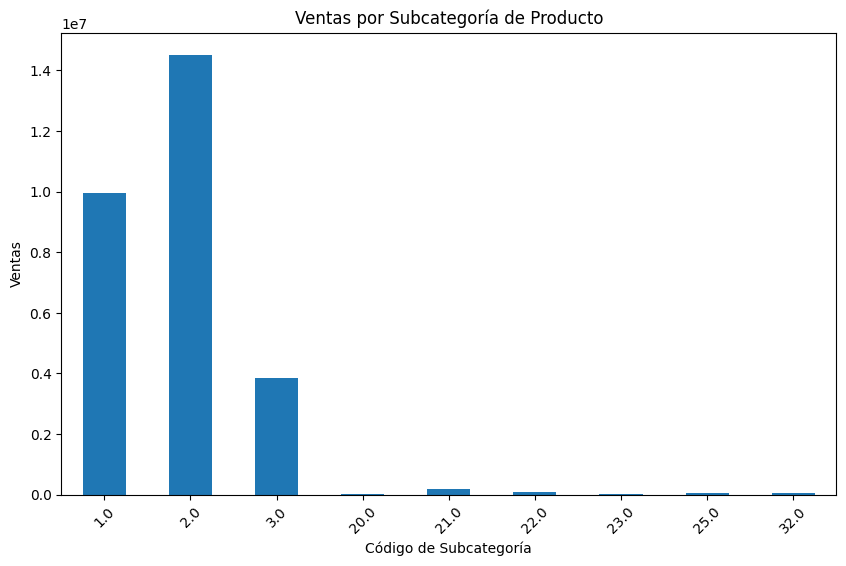

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combinar los DataFrames en uno nuevo basado en el código de producto
combined_data = pd.merge(sheet_products, sheet_sales, left_on='IdProducto', right_on='CodProducto')

# Gráfico de barras: Ventas por Subcategoría de Producto
ventas_por_subcategoria = combined_data.groupby('CodSubcategoria')['Venta'].sum()
ventas_por_subcategoria.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Código de Subcategoría')
plt.ylabel('Ventas')
plt.title('Ventas por Subcategoría de Producto')
plt.xticks(rotation=45)
plt.show()

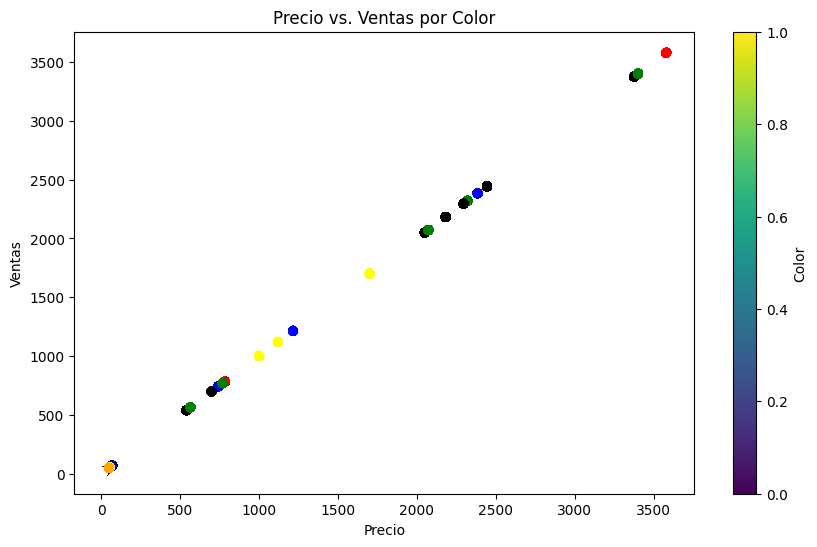

In [28]:
# Gráfico de dispersión: Precio vs. Ventas por Color
color_mapping = {
    'Amarillo': 'yellow',
    'Rojo': 'red',
    'Azul': 'blue',
    'Verde': 'green',
    'Negro': 'black',
    'Blanco':'white',
    'Naranja': 'orange'
    # Agregar más colores y mapeos según tus datos
}
# Mapear los colores de la columna 'Color' a valores numéricos de color
combined_data['Color_Num'] = combined_data['Color'].map(color_mapping)
# Gráfico de dispersión: Precio vs. Ventas por Color
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['Precio'], combined_data['Venta'], c=combined_data['Color_Num'])
plt.xlabel('Precio')
plt.ylabel('Ventas')
plt.title('Precio vs. Ventas por Color')
plt.colorbar(label='Color')
plt.show()

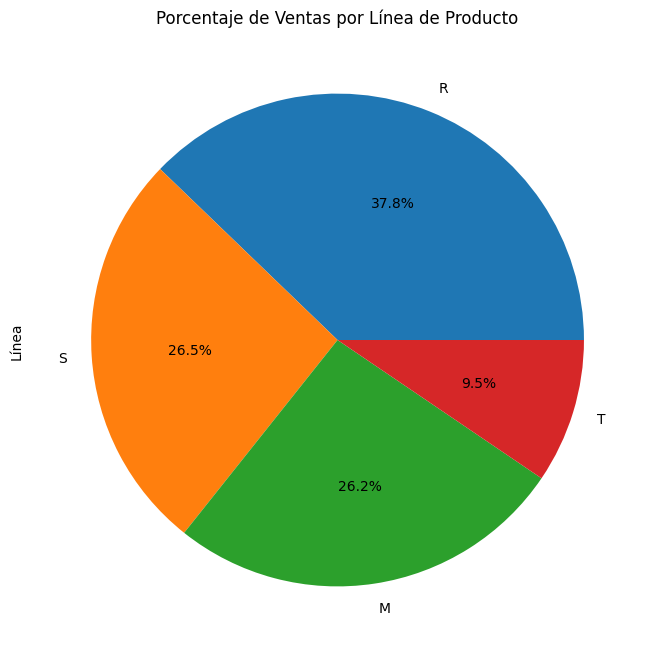

In [31]:
# Gráfico de pastel: Porcentaje de Ventas por Línea de Producto
porcentaje_linea = combined_data['Línea'].value_counts()
porcentaje_linea.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Porcentaje de Ventas por Línea de Producto')
plt.show()

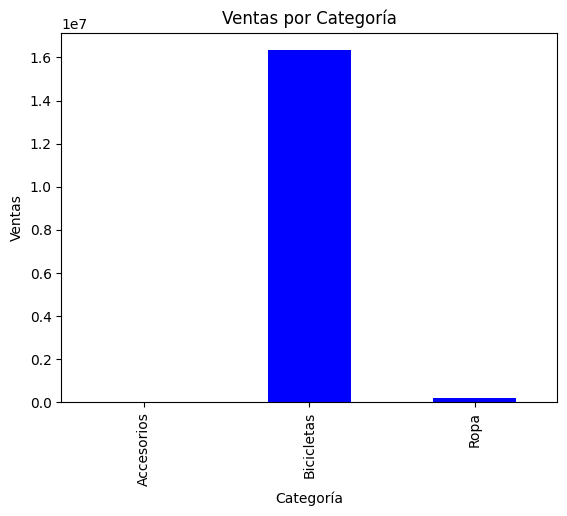

In [33]:
# Combinamos las diferentes tablas para realizar un análisis más profundo

# Combinar las tablas relevantes
merged_data = pd.merge(sheet_sales, sheet_products, left_on='CodProducto', right_on='IdProducto')
merged_data = pd.merge(merged_data, sheet_dates, left_on='Fecha Orden', right_on='Fecha')
merged_data = pd.merge(merged_data, sheet_customers, left_on='CodCliente', right_on='IdCliente')
merged_data = pd.merge(merged_data, sheet_subcategory, left_on='CodSubcategoria', right_on='IdSubcategoria')
merged_data = pd.merge(merged_data, sheet_category, left_on='CodCategoria', right_on='IdCategoria')

# Gráfico básico: Ventas por categoría
category_sales = merged_data.groupby('Categoría')['Venta'].sum()
category_sales.plot(kind='bar', color='blue')
plt.xlabel('Categoría')
plt.ylabel('Ventas')
plt.title('Ventas por Categoría')
plt.show()

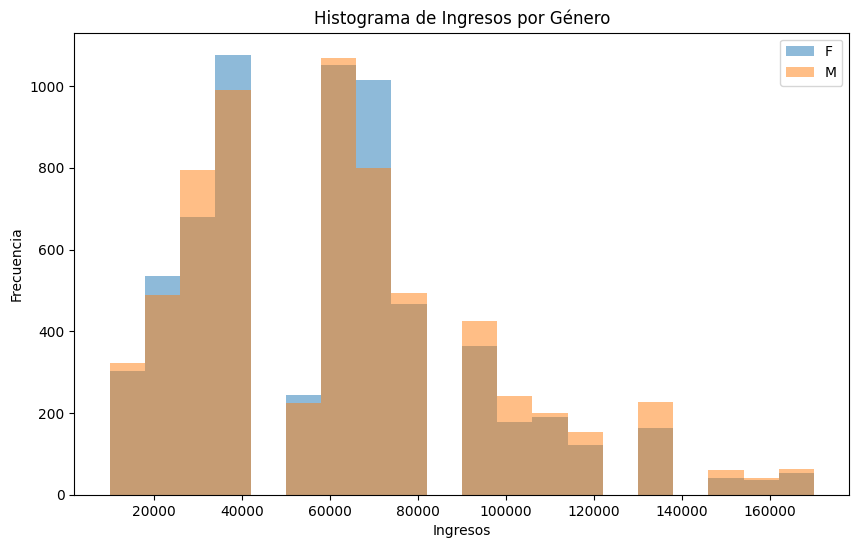

In [34]:
# Gráfico intermedio: Histograma de ingresos por género
plt.figure(figsize=(10, 6))
merged_data.groupby('Género')['Ingresos'].plot(kind='hist', alpha=0.5, bins=20)
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Ingresos por Género')
plt.legend()
plt.show()

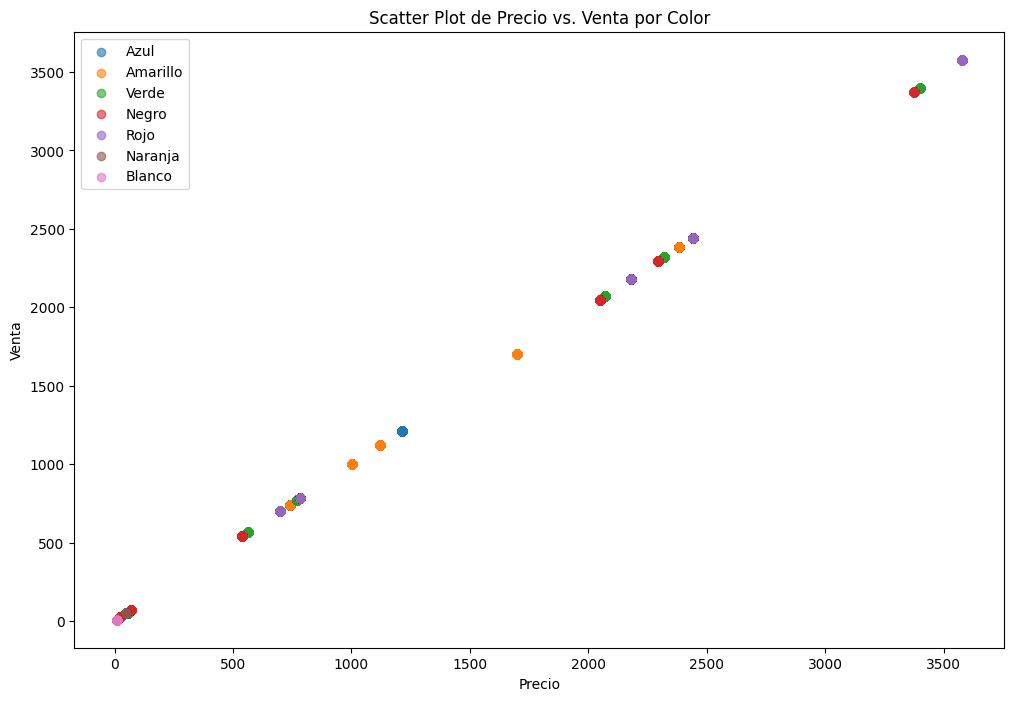

In [35]:
# Gráfico avanzado: Scatter plot de Precio vs. Venta por Color
plt.figure(figsize=(12, 8))
colors = merged_data['Color'].unique()
for color in colors:
    subset = merged_data[merged_data['Color'] == color]
    plt.scatter(subset['Precio'], subset['Venta'], label=color, alpha=0.6)
plt.xlabel('Precio')
plt.ylabel('Venta')
plt.title('Scatter Plot de Precio vs. Venta por Color')
plt.legend()
plt.show()

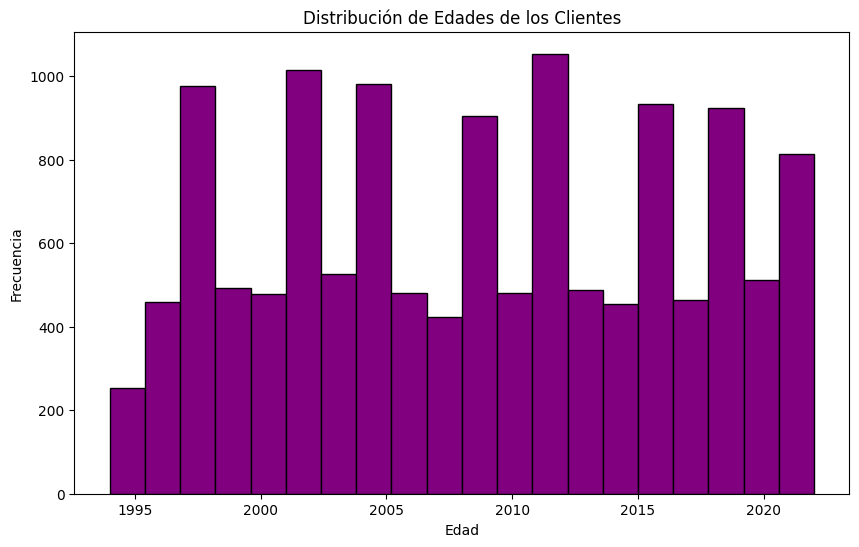

In [39]:
# Gráfico básico: Distribución de Edades de los Clientes
plt.figure(figsize=(10, 6))
merged_data['Edad'] = 2023 - merged_data['Nacimiento'].astype(str).str.split('-').str[-1].astype(int)
plt.hist(merged_data['Edad'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de los Clientes')
plt.show()

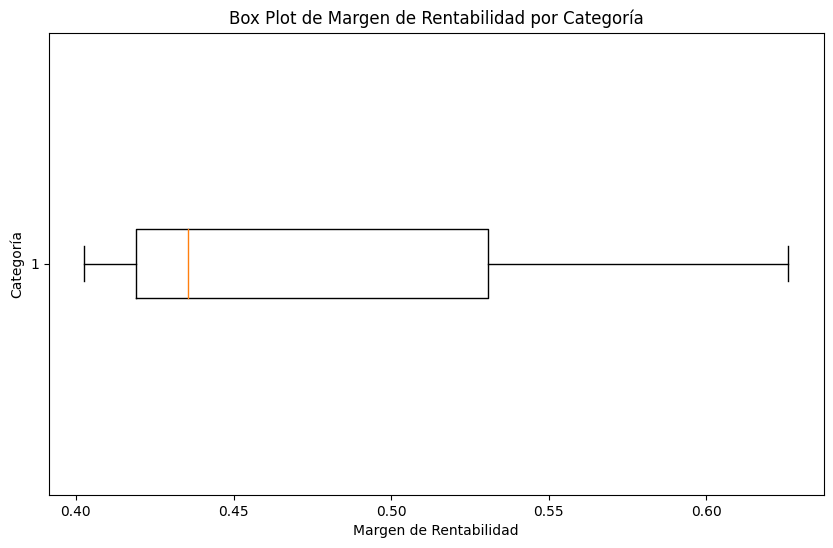

In [40]:
# Gráfico intermedio: Box plot de Margen de Rentabilidad por Categoría
plt.figure(figsize=(10, 6))
plt.boxplot(merged_data.groupby('Categoría')['Margen de rentabilidad'].mean(), vert=False)
plt.xlabel('Margen de Rentabilidad')
plt.ylabel('Categoría')
plt.title('Box Plot de Margen de Rentabilidad por Categoría')
plt.show()

<ipython-input-41-348b8ed534aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


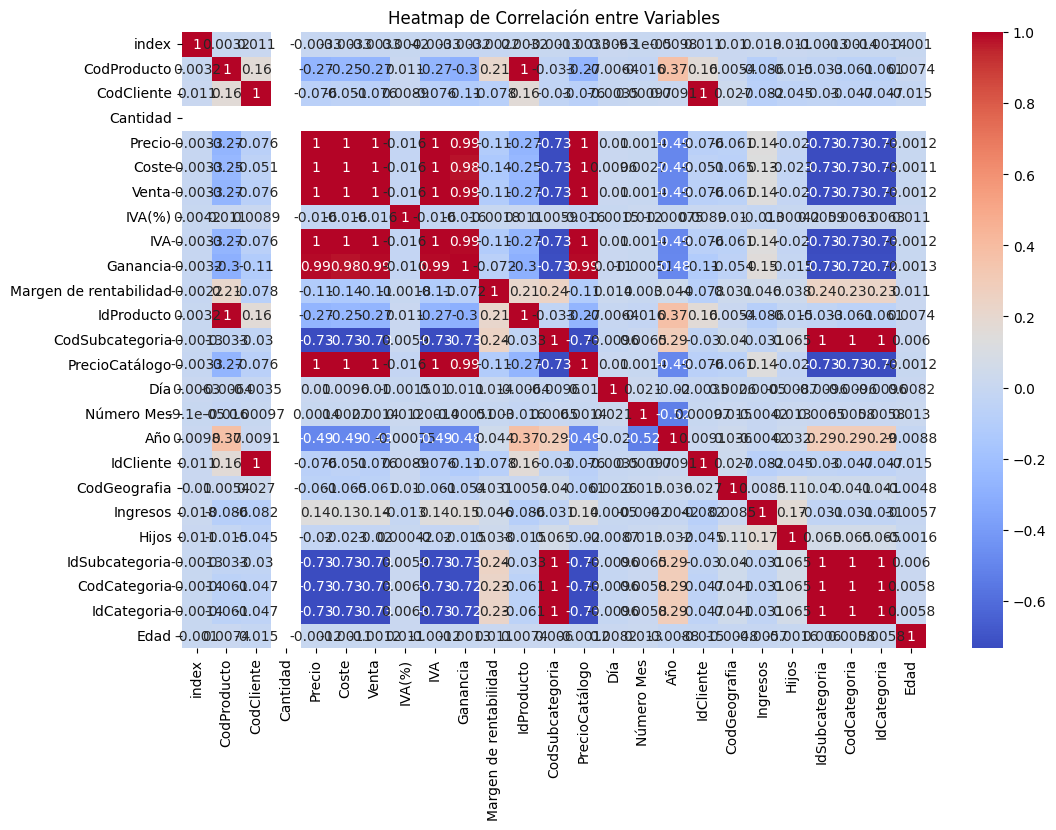

In [41]:
# Gráfico avanzado: Heatmap de Correlación entre Variables
correlation_matrix = merged_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlación entre Variables')
plt.show()


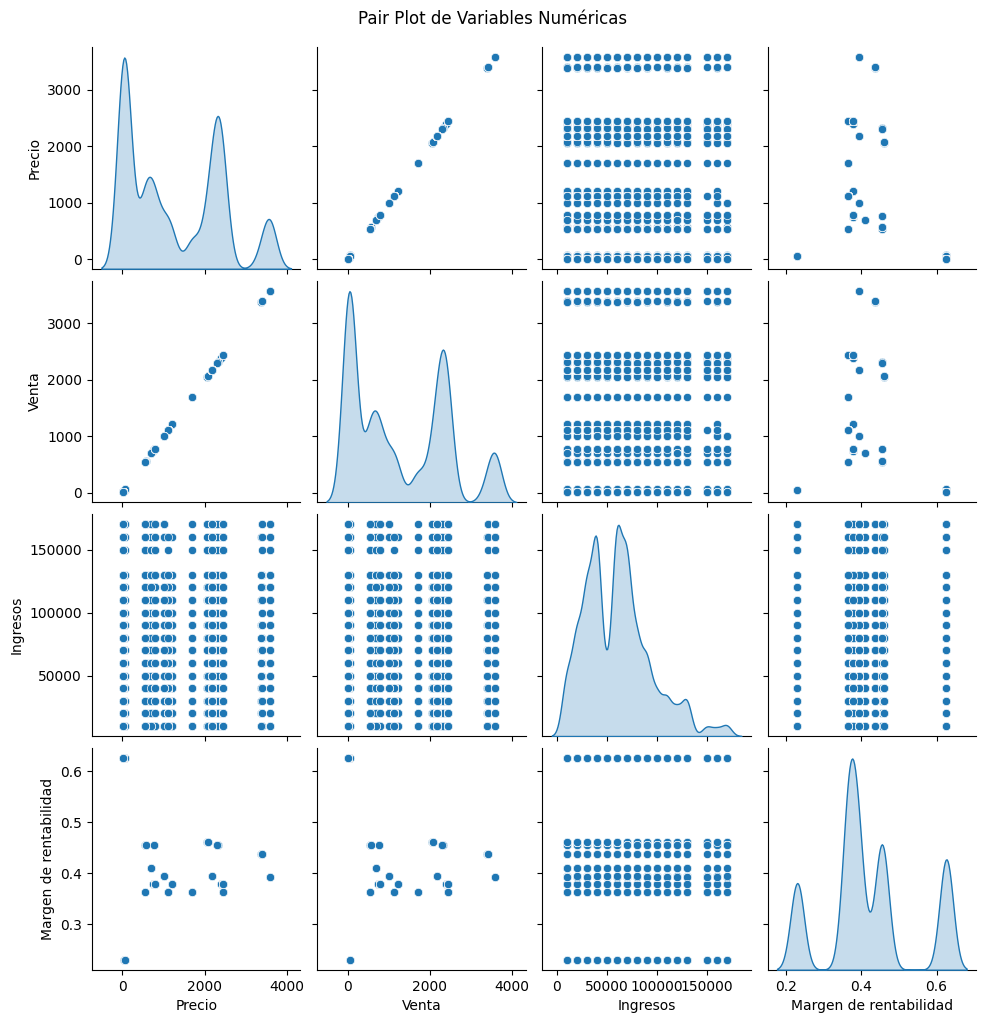

In [42]:
# Gráfico avanzado: Pair plot de Variables Numéricas
sns.pairplot(merged_data[['Precio', 'Venta', 'Ingresos', 'Margen de rentabilidad']], diag_kind='kde')
plt.suptitle('Pair Plot de Variables Numéricas', y=1.02)
plt.show()

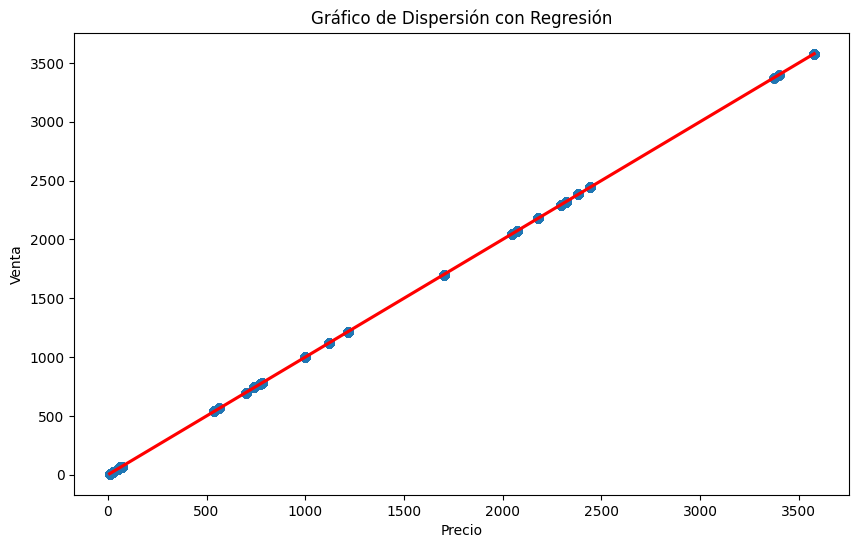

In [43]:
# Gráfico avanzado: Gráfico de Dispersión con Regresión
plt.figure(figsize=(10, 6))
sns.regplot(x='Precio', y='Venta', data=merged_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Precio')
plt.ylabel('Venta')
plt.title('Gráfico de Dispersión con Regresión')
plt.show()



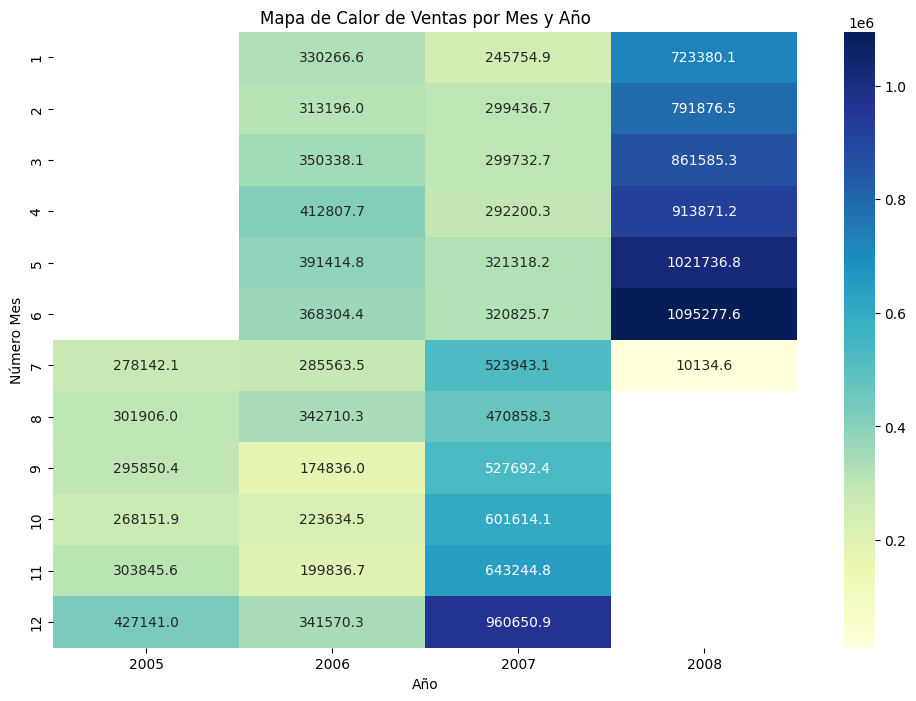

In [44]:

# Gráfico avanzado: Mapa de Calor de Ventas por Mes y Año
sales_heatmap = merged_data.pivot_table(values='Venta', index='Número Mes', columns='Año', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(sales_heatmap, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Mapa de Calor de Ventas por Mes y Año')
plt.show()

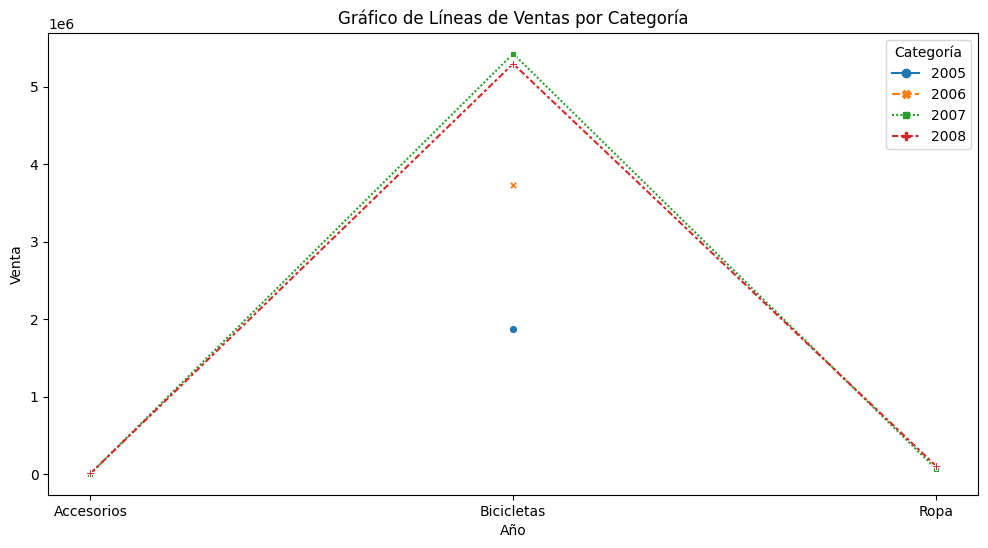

In [45]:
# Gráfico avanzado: Gráfico de Líneas de Ventas por Categoría
sales_by_category = merged_data.groupby(['Categoría', 'Año'])['Venta'].sum().unstack()
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_category, markers=True)
plt.xlabel('Año')
plt.ylabel('Venta')
plt.title('Gráfico de Líneas de Ventas por Categoría')
plt.legend(title='Categoría')
plt.show()

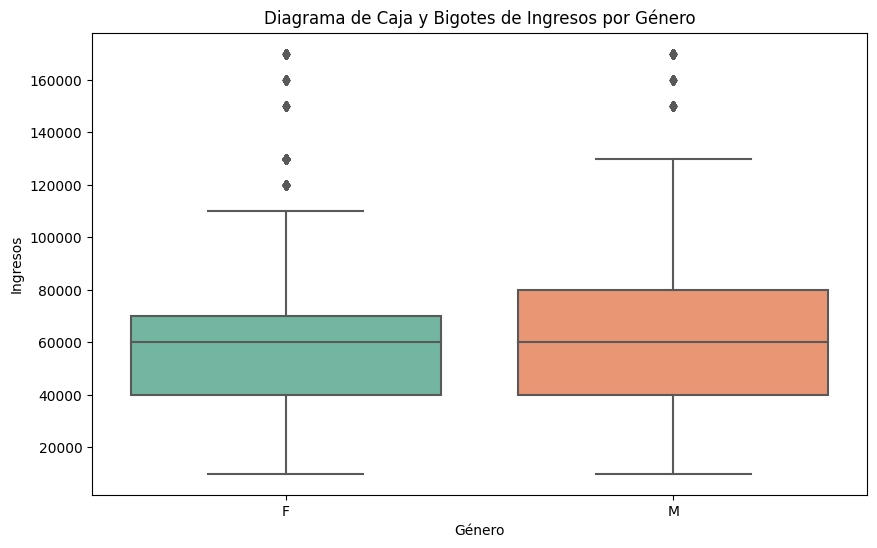

In [46]:
# Gráfico avanzado: Diagrama de Caja y Bigotes de Ingresos por Género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Género', y='Ingresos', data=merged_data, palette='Set2')
plt.xlabel('Género')
plt.ylabel('Ingresos')
plt.title('Diagrama de Caja y Bigotes de Ingresos por Género')
plt.show()

# Manejo de datos con Matplotlib y Seaborn

# EDA (Análisis Exploratorio de Datos)

# Manipulación de Datos con Numpy

# Introducción a Machine Learning:

## Algoritmos Supervisados:


## Algoritmos No Supervisados:

# Análisis de Texto y Procesamiento de Lenguaje Natural (NLP)